# Data Scaling

### Why shoud we scale our data?

Distance algorithms such as KNN, K-means, and SVM are most affected by feature space. This is because they use distances between data points to determine their similarity.

If two features have different scales, there is a possibility that the features with higher magnitude will be given higher weights. This affects the performance of the machine learning algorithm, and we obviously do not want our algorithm to be biased towards one feature.

##### One Example

<img src='img_scaling/beispiel.PNG' >

##### Which algorithms are scale-variant or scale-invariant?

There are families of algorithms that are scale invariant, such as the tree-based algorithms, where scaling is not required because they are not distance-based models.
Thus, we make decisions, "Is feature x_i >= some_val?" Intuitively, we can see that it really doesn't matter what scale this feature has (centimeters, Fahrenheit, a standardized scale - it really doesn't matter).

Some algorithms, such as Linear Discriminant Analysis (LDA) and Naive Bayes, weight features based on their range, so scaling does not affect these algorithms.

There are other algorithms where scaling is necessary or helpful: 

These are distance algorithms such as KNN, K-means and SVM are most affected by the scale of features. This is because they use distances between data points to determine their similarity. Scaling helps us avoid bias towards the high value features. 

Neural networks also benefit from feature scaling.
In general, features are scaled because it leads to faster convergence in gradient dependent algorithms. (It will be shown below)

### Standardization and Normalization

##### Standardization - Z-Score

The result of standardization (or Z-score normalization) is that the characteristics are rescaled to have the properties of a standard normal distribution with
- μ=0 and
- σ=1

where μ is the mean (average) and σ is the standard deviation from the mean; the standard scores (also called z-scores) of the samples are calculated as follows:

<img src='img_scaling/standardisierung.PNG'>

Standardizing features so that they are centered around 0 with a standard deviation of 1 is not only important when we compare measurements with different units, but is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks, etc.); with features that are on different scales, certain weights can be updated faster than others because the feature values xj play a role in the weight updates

We should also consider whether we want to "standardize" or "normalize" (here: scale to the range [0, 1]) our data. Some algorithms assume that our data is centered at 0. For example, if we initialize the weights of a small multilayer perceptron with tanh activation units centered at 0 or small random values centered around 0, we want to update the model weights "uniformly". As a rule of thumb, I would say: when in doubt, just standardize the data, it can't hurt.

### Normalization - Min-Max scalling

An alternative approach to Z-score normalization (or standardization) is so-called min-max scaling (often simply called "normalization" - a common cause of ambiguity).
In this approach, data are scaled to a fixed range - usually 0 to 1.
The cost of this limited range - as opposed to normalization - is that we end up with smaller standard deviations, which can suppress the effect of outliers.

Min-max scaling is typically performed using the following equation:

<img src='img_scaling/normalisierung.PNG'>

### Z-score Standardizuation or Min-Max Normalization?

"Normalization or Min-Max Scaling?" - There is no clear answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be particularly important to compare similarities between features based on certain distance measures. Another prominent example is principal component analysis, where we usually prefer standardization to min-max scaling because we are interested in the components that maximize variance (depending on the question and whether PCA calculates components using the correlation matrix rather than the covariance matrix; but more on PCA in my previous article).

This is not to say that min-max scaling is not useful at all! A popular application is image processing, where pixel intensities need to be normalized to fit a certain range (e.g., 0 to 255 for the RGB color range). Also, typical neural network algorithms require data that is on a scale of 0 to 1.

### Standardize and normalize - how it can be done with scikit-learn

Of course, we could use NumPy's vectorization capabilities to calculate the z-scores for standardization and normalize the data using the equations mentioned in the previous sections. However, there is an even more convenient approach that uses the preprocessing module from one of Python's open-source machine learning libraries, scikit-learn.

### Example on wine dataset

For the following examples and discussion, we will look at the free "Wine" dataset deposited on the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine).

The wine dataset consists of 3 different classes, with each row corresponding to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and columns 2-14 correspond to 13 different attributes (features):

1) Alcohol (percent/volume).

2) Malic acid (g/l))

In [1]:
#load data

import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


As can be seen in the table above, the characteristics alcohol (percent/volume) and malic acid (g/l) are measured on different scales, so characteristic scaling is necessary before comparing or combining these data.

##### Standardization

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
std_scale = StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

In [6]:
pd.DataFrame(df_std).head()

,0,1
0,1.518613,-0.562250
1,0.246290,-0.499413
2,0.196879,0.021231
3,1.691550,-0.346811
4,0.295700,0.227694


Check Mean and Standard Deviation

In [8]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


##### Normalisierung

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
minmax_scale = MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [11]:
pd.DataFrame(df_minmax).head()

,0,1
0,0.842105,0.191700
1,0.571053,0.205534
2,0.560526,0.320158
3,0.878947,0.239130
4,0.581579,0.365613


Check minimum and maximum value

In [12]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))


Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


Plot the outcome

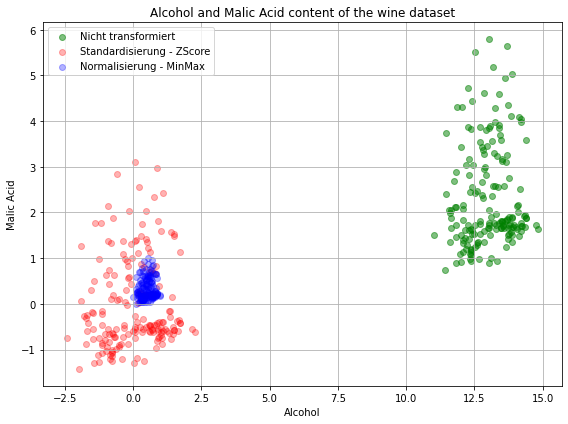

In [13]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='Nicht transformiert', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardisierung - ZScore', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='Normalisierung - MinMax', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()


The above diagram contains the wine data points on all three different scales: the input scale where the alcohol content was measured in volume percent (green), the standardized characteristics (red) and the normalized characteristics (blue). In the following plot we will zoom into the three different axis scales

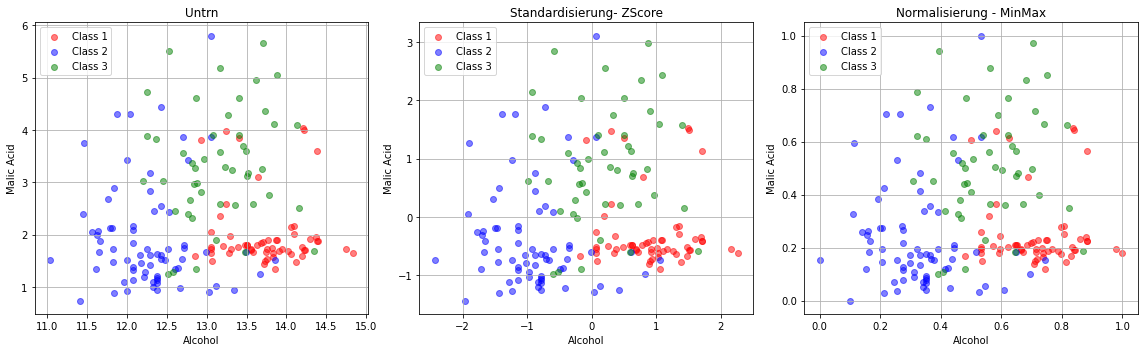

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Untrn',
                'Standardisierung- ZScore',
                'Normalisierung - MinMax')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

The arrangement of data points to each other or different classes to each other does not change.

### Use Scaling

Wir werden wieder eine Visualisierungsfunktion nutzen.

In [15]:
from matplotlib.colors import ListedColormap

def plot_ergebnis(X_train, y_train, X_test, clf):
    X = np.vstack((X_train, X_test))
    y = np.hstack((y_train, y_test))
    
    plot_step = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Plot Entscheidungsfunktion und Datenpunkte + Vorhersagen
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['red', 'blue', 'green']))
    plt.scatter(X[:,0],  X[:,1], alpha=0.25, c=y, cmap=ListedColormap(['red', 'blue', 'green']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['red', 'blue', 'green']))

In [16]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=42)


In [17]:
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [18]:
minmax_scale = MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scale.transform(X_train)
X_test_minmax = minmax_scale.transform(X_test)

In [19]:
from sklearn.metrics import accuracy_score

def evaluate_ergebnis(clf, X_test, y_test): 
    y_pred = clf.predict(X_test)
    print('accuracy %f' % accuracy_score(y_pred, y_test))

##### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
# on non-standardized data
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(X_train, y_train)

evaluate_ergebnis(dt, X_test, y_test)

accuracy 0.777778


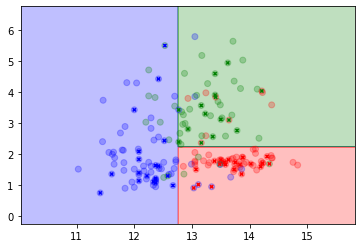

In [22]:
plot_ergebnis(X_train, y_train, X_test, dt)

In [23]:
# on non-standardized data
dt_std = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_std.fit(X_train_std, y_train)

evaluate_ergebnis(dt_std, X_test_std, y_test)

accuracy 0.777778


In [24]:
# on normalized data
dt_minmax = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_minmax.fit(X_train_minmax, y_train)

evaluate_ergebnis(dt_minmax, X_test_minmax, y_test)

accuracy 0.777778


### Exercise

Also train a support vector machine with
- unscaled 
- standardize 
- normalized 
data

##### Support Vector Machine

In [2]:
from sklearn.svm import SVC

In [ ]:
#code here

def ML_scale_compare(dataframe, scaling_model, ML_model):
    df
    

In [9]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [11]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

def evaluate_ergebnis(clf, X_test, y_test): 
    y_pred = clf.predict(X_test)
    print('accuracy %f' % accuracy_score(y_pred, y_test))
    
evaluate_ergebnis(model, X_test, y_test)

accuracy 0.740741


In [23]:
def ML_scale_printacc(dataframe, scaling_model, ML_model):
    from sklearn.model_selection import train_test_split

    X_wine = dataframe.values[:,1:]
    y_wine = dataframe.values[:,0]

    X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.30, random_state=42)


    scaling_model.fit(X_train)
    X_train = scaling_model.transform(X_train)
    X_test = scaling_model.transform(X_test)

    ML_model.fit(X_train, y_train)

    from sklearn.metrics import accuracy_score

    def evaluate_ergebnis(clf, X_test, y_test): 
        y_pred = clf.predict(X_test)
        print('accuracy %f' % accuracy_score(y_pred, y_test))
        
    evaluate_ergebnis(ML_model, X_test, y_test)

    # from matplotlib.colors import ListedColormap

    # def plot_ergebnis(X_train, y_train, X_test, ML_model):
    #     X = np.vstack((X_train, X_test))
    #     y = np.hstack((y_train, y_test))
        
    #     plot_step = 0.02
    #     x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    #     y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    #     xx, yy = np.meshgrid(
    #         np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    #     )
        
        #Plot Entscheidungsfunktion und Datenpunkte + Vorhersagen
        # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Z = Z.reshape(xx.shape)
        # plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['red', 'blue', 'green']))
        # plt.scatter(X[:,0],  X[:,1], alpha=0.25, c=y, cmap=ListedColormap(['red', 'blue', 'green']))
        # y_pred=clf.predict(X_test)
        # plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['red', 'blue', 'green']))



In [24]:
ML_scale_printacc(df, StandardScaler(), SVC())

accuracy 0.814815


##### Sources

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

https://medium.datadriveninvestor.com/feature-scaling-why-what-where-how-683f61812f4c

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [2]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59
